# Manufacturing

##Importing dataset

In [ ]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import simpy as sp
import sys

##Initialize given constant

In [ ]:
#Initializing Variables
meanOperateTime = 8.0
meanRepairTime = 2.0
brokenCost = 50
repairmanEmployPerHour = 10
totalHour = 800
machineBrokenTime = []
machineRepairTime = []

##Simulate random time



In [ ]:
# Machine run time to failure
def generate_time_to_failure():
  return np.random.exponential(meanOperateTime)

# Repair time of a repairman
def generate_repair_time():
   return np.random.exponential(meanRepairTime)

##Operating the machine run
This function simulates the time run and when each machines is broken

In [ ]:
def operate_machine(env, repairmen, numMachines, brokeTime, avaiMachines):
  global cost
  global machinesAvailable 
  machinesAvailable = numMachines
  #generate machine failure
  while True:
    yield env.timeout(generate_time_to_failure())
    t_broken = env.now
    #record and output the state of available machines and brake down times
    if machinesAvailable >= 0:
      # print("Machine broke at", round(t_broken, 2))
      machineBrokenTime.append(round(t_broken, 2))
      brokeTime.append(t_broken)
      avaiMachines.append(machinesAvailable)
      machinesAvailable -= 1
      # print("Machine available:", machinesAvailable)
    else:
      machinesAvailable = 0
    env.process(repair_machine(env, repairmen, numMachines))
    cost += brokenCost * t_broken

## Operate the repairing case of each repair man
This function simulates the time to repair a machine

In [ ]:
def repair_machine(env, repairmen, numMachines):
  with repairmen.request() as request:
    yield request
    yield env.timeout(generate_repair_time())
  # print("Repair completed at", round(env.now,2))
  global machinesAvailable
  # avaiMachines.append(machinesAvailable)
  if machinesAvailable >= numMachines:
    machinesAvailable = numMachines
  else:
    machinesAvailable += 1
    machineRepairTime.append(round(env.now,2))
  # print("Machine available:", machinesAvailable)

## Run the system with simulated machines and repairmen

In [ ]:
def manu_system_run(env, repairmen, numMachines, brokeTime, avaiMachines):
  global cost
  cost = 0.0

  for i in range(numMachines):
    env.process(operate_machine(env, repairmen, numMachines, brokeTime, avaiMachines))
  while True:
    cost += repairmanEmployPerHour * repairmen.capacity 
    yield env.timeout(1.0) # update the cost each hour

## Set up environment

In [ ]:
def observe(env, obs_times, obs_cost):
  while True:
    obs_times.append(env.now)
    obs_cost.append(cost)
    yield env.timeout(1.0)

## Function to run a simulation with a number of machine added.

In [ ]:
def initiateSimulation(machineAdd):
  brokeTime = []
  avaiMachines  = []
  np.random.seed(420)
  env = sp.Environment()
  obs_times = []
  obs_cost = []
  repairmen = sp.Resource(env, capacity = 2)
  env.process(manu_system_run(env, repairmen, 3 + machineAdd, brokeTime, avaiMachines))
  env.process(observe(env, obs_times, obs_cost))
  env.run(until=800)
  # plot the cost growth over time
  plt.figure()
  plt.step(obs_times, obs_cost, where = 'post')
  plt.xlabel('Time (hours)')
  plt.ylabel('Cost Incurred')
  plt.title('Cost over time')
  plt.show()
  print()
  # plot the time of machine changed
  plt.figure(figsize=(12, 8), dpi=80)
  plt.xlabel('Time (hours)')
  plt.ylabel('Machines Available')
  plt.title('Number of Machines Available over time')
  plt.plot(brokeTime, avaiMachines, 'o')
  plt.show()

##Simulation with no added machines

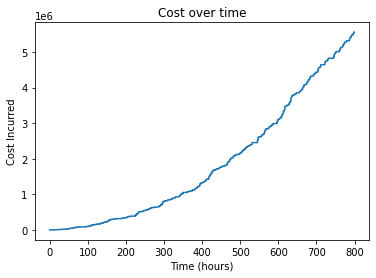

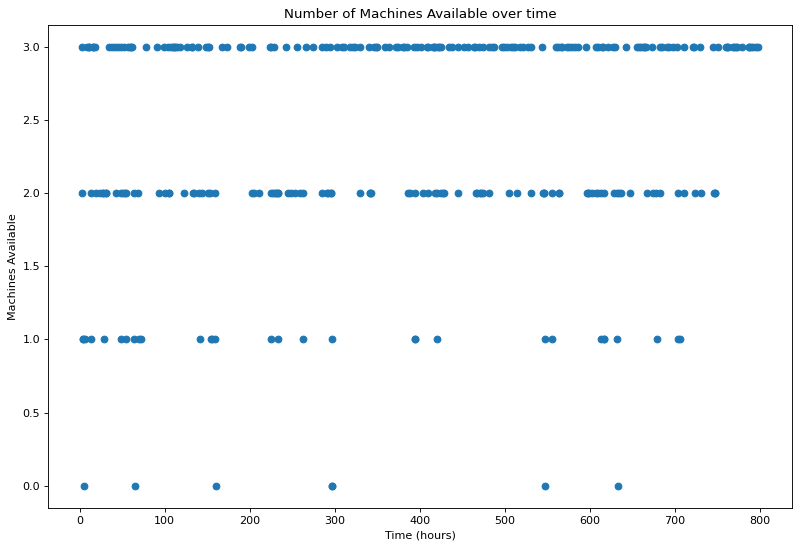

In [ ]:
machineBrokenTime.clear()
machineRepairTime.clear()
initiateSimulation(0)
df = pd.DataFrame({"Machine Broken Time": machineBrokenTime})
df2 = pd.DataFrame({"Machine Repair Time": machineRepairTime})
df.to_csv("Broken Summary Zero Added.csv", index = False)
df2.to_csv("Repair Summary Zero Added.csv", index = False)

## Simulation with one machine added

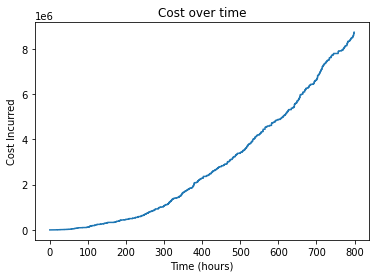

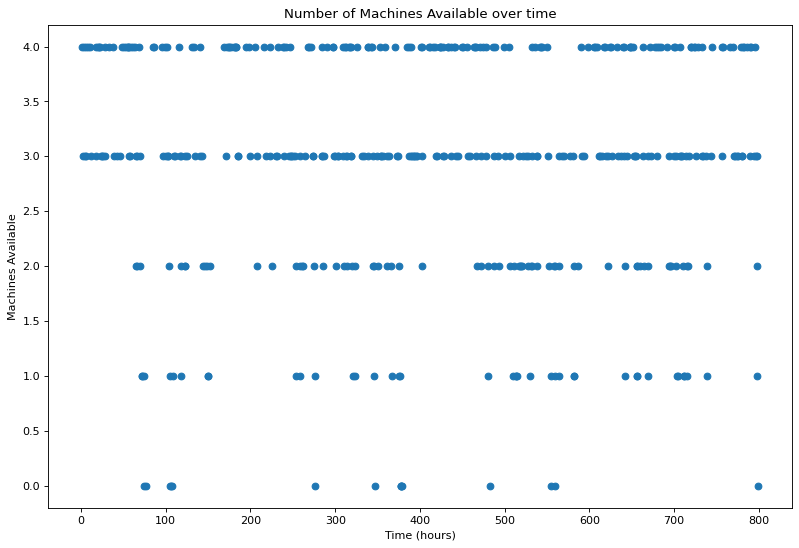

In [ ]:
machineBrokenTime.clear()
machineRepairTime.clear()
initiateSimulation(1)
df = pd.DataFrame({"Machine Broken Time": machineBrokenTime})
df2 = pd.DataFrame({"Machine Repair Time": machineRepairTime})
df.to_csv("Broken Summary One Added.csv", index = False)
df2.to_csv("Repair Summary One Added.csv", index = False)

## Simulation with two machine added

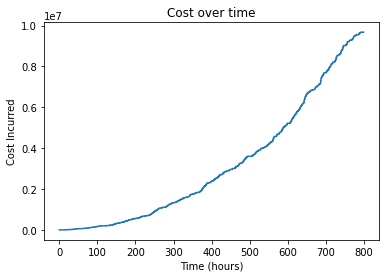

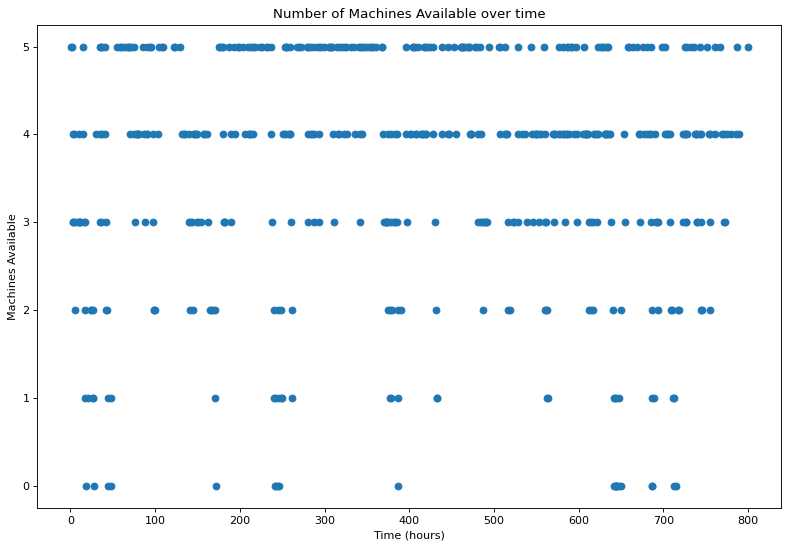

In [ ]:
machineBrokenTime.clear()
machineRepairTime.clear()
initiateSimulation(2)
df = pd.DataFrame({"Machine Broken Time": machineBrokenTime})
df2 = pd.DataFrame({"Machine Repair Time": machineRepairTime})
df.to_csv("Broken Summary Two Added.csv", index = False)
df2.to_csv("Repair Summary Two Added.csv", index = False)

## Simulation with three machine added

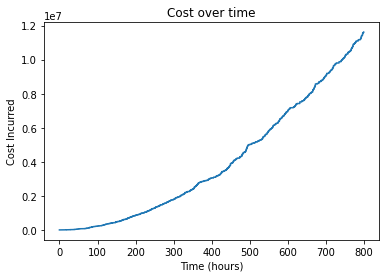

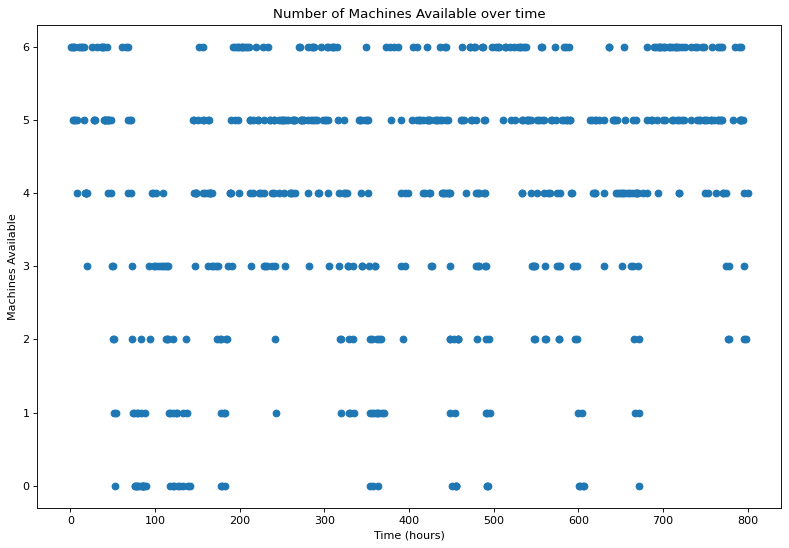

In [ ]:
machineBrokenTime.clear()
machineRepairTime.clear()
initiateSimulation(3)
df = pd.DataFrame({"Machine Broken Time": machineBrokenTime})
df2 = pd.DataFrame({"Machine Repair Time": machineRepairTime})
df.to_csv("Broken Summary Three Added.csv", index = False)
df2.to_csv("Repair Summary Three Added.csv", index = False)